# Heuristicas

In [2]:
import utils
import pandas as pd
import seaborn as sns

DATA = "../data/sim.dat"
POWERS = "../data/sim_powers.tsv"

In [3]:
def read_powers() -> pd.DataFrame:
    return pd.read_csv(
        POWERS,
        sep=' ',
        header=None,
        names=["team", "power"],
    )

def read_sim_ranking(method: str):
    powers = read_powers()
    ranking = utils.read_ranking(DATA+method+utils.OUT)
    ranking["power"] = (ranking.index + 1).map(powers.set_index("team")["power"])
    ranking["team"] = (ranking.index+1)
    return ranking

In [ ]:
utils.run(DATA, utils.METHOD_CMM)
utils.run(DATA, utils.METHOD_WP)

In [ ]:
read_sim_ranking(utils.METHOD_CMM).sort_values("rating", ascending=False)

In [ ]:
utils.analyze_data(DATA)

In [14]:
# iterar e imprimir boxplot

import simulator
import time
from tqdm import tqdm

TEAM = 20
ITER = 100

results = pd.DataFrame(columns=["rating", "wins"])

for i in tqdm(range(ITER)):
    simulator.simulate(team_count=20)
    utils.run(DATA, utils.METHOD_CMM)
    ranking = read_sim_ranking(utils.METHOD_CMM)
    analyzed_data = utils.analyze_data(DATA)
    results.loc[i] = [
        ranking.set_index("team").at[TEAM, "rating"],
        analyzed_data.set_index("team").loc[TEAM].values[2] # wins
    ]

print("Done!")

100%|██████████| 100/100 [00:16<00:00,  6.20it/s]


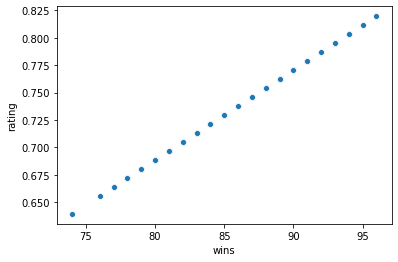

In [18]:
sns.scatterplot(results["wins"], results["rating"])

In [ ]:
def heuristic(games: List[simulator.Game]) -> List[simulator.Game]:
    # calculas cmm
    # run()
    # modificas los partididos segun tu heuristica
    # run()
    # ves el ranking
    